In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from PIL import Image
fig_size = (12, 9)
plt.rcParams["figure.figsize"] = fig_size

## FFT basics

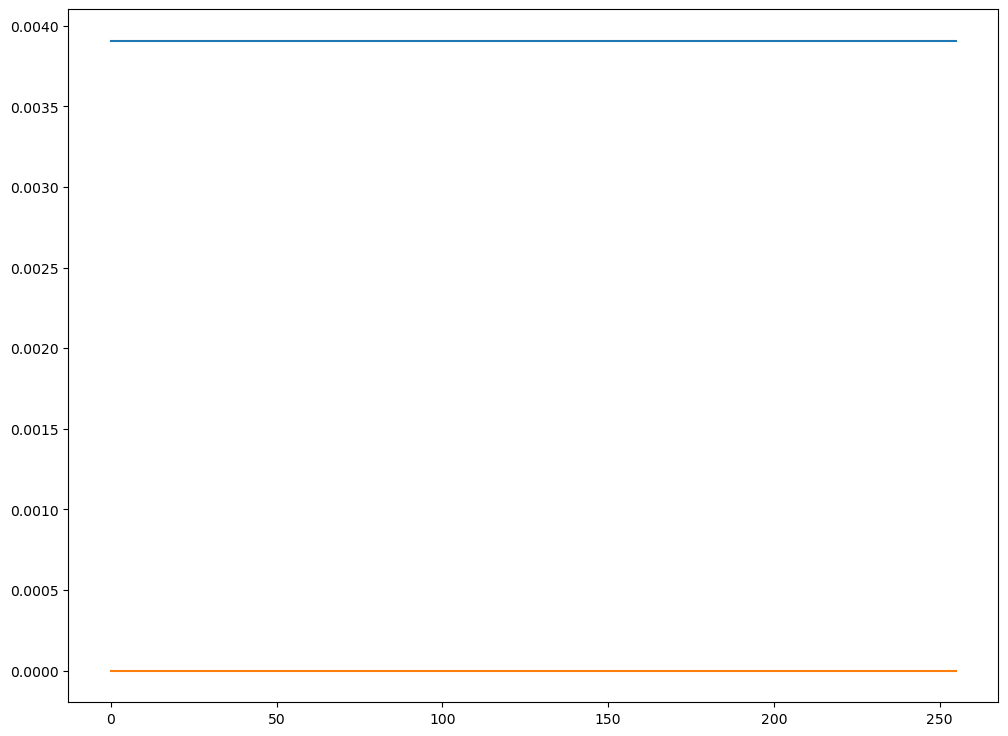

In [3]:
fk = np.zeros(256, dtype=np.complex64)
fk[0] = 1.
fx = np.fft.ifft(fk)

plt.plot(fx.real)
plt.plot(fx.imag)

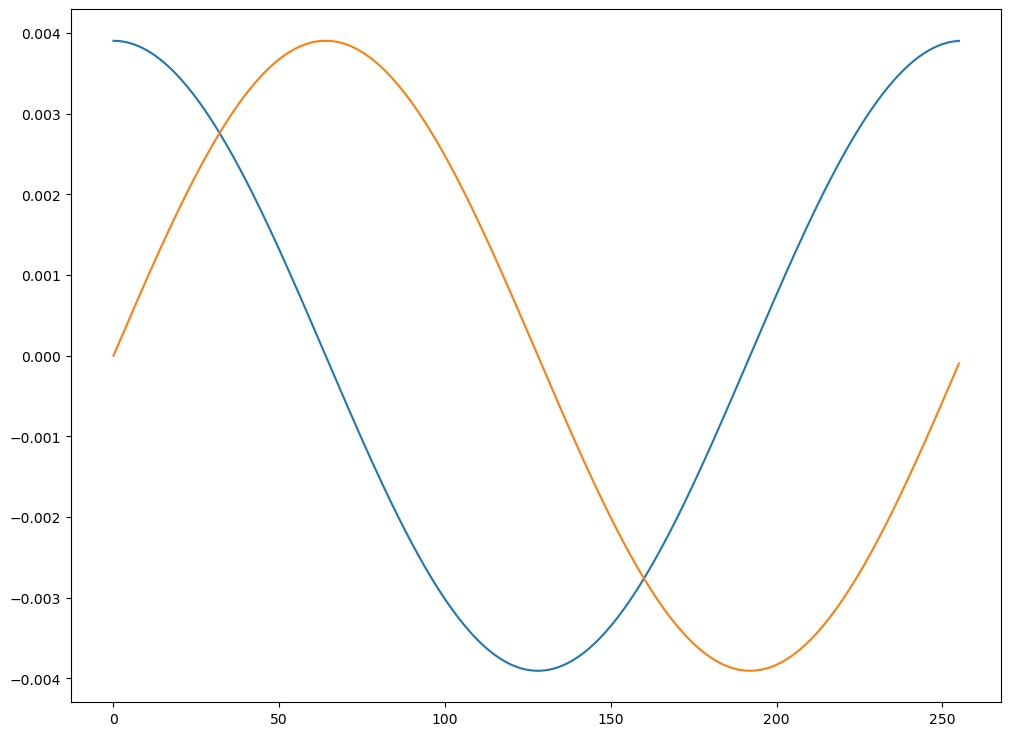

In [5]:
fk = np.zeros(256, dtype=np.complex64)
fk[1] = 1. + 0.j
fx = np.fft.ifft(fk)

plt.plot(fx.real)
plt.plot(fx.imag)

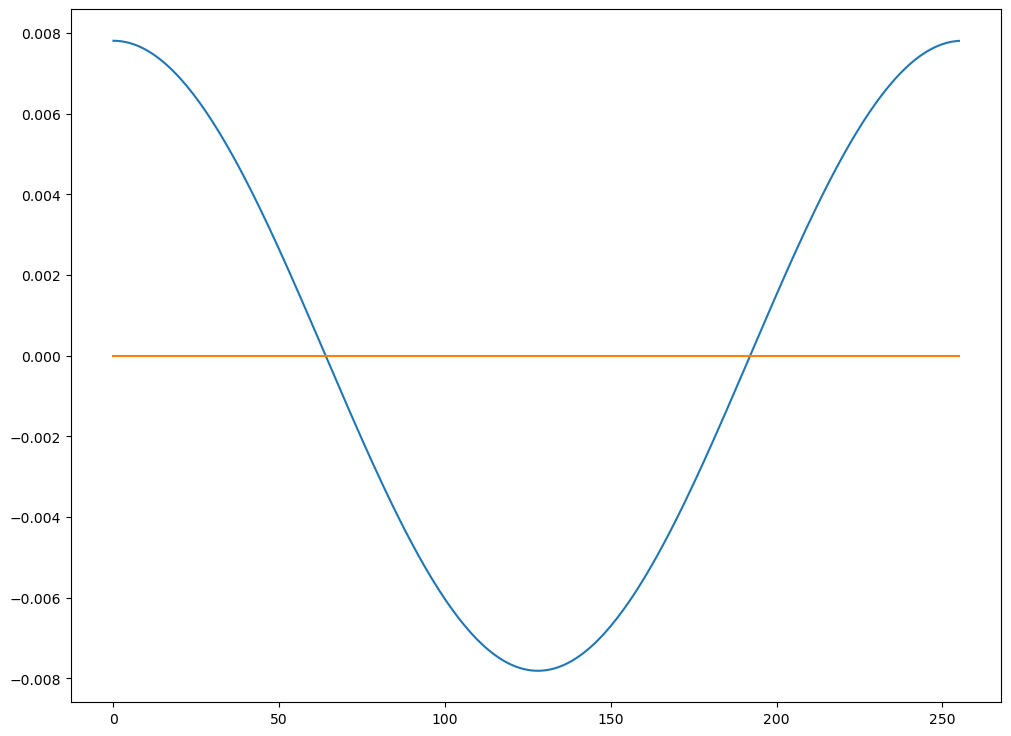

In [6]:
fk = np.zeros(256, dtype=np.complex64)
fk[1] = 1. + 0.j
fk[-1] = (1. + 0.j)
fx = np.fft.ifft(fk)

plt.plot(fx.real)
plt.plot(fx.imag)

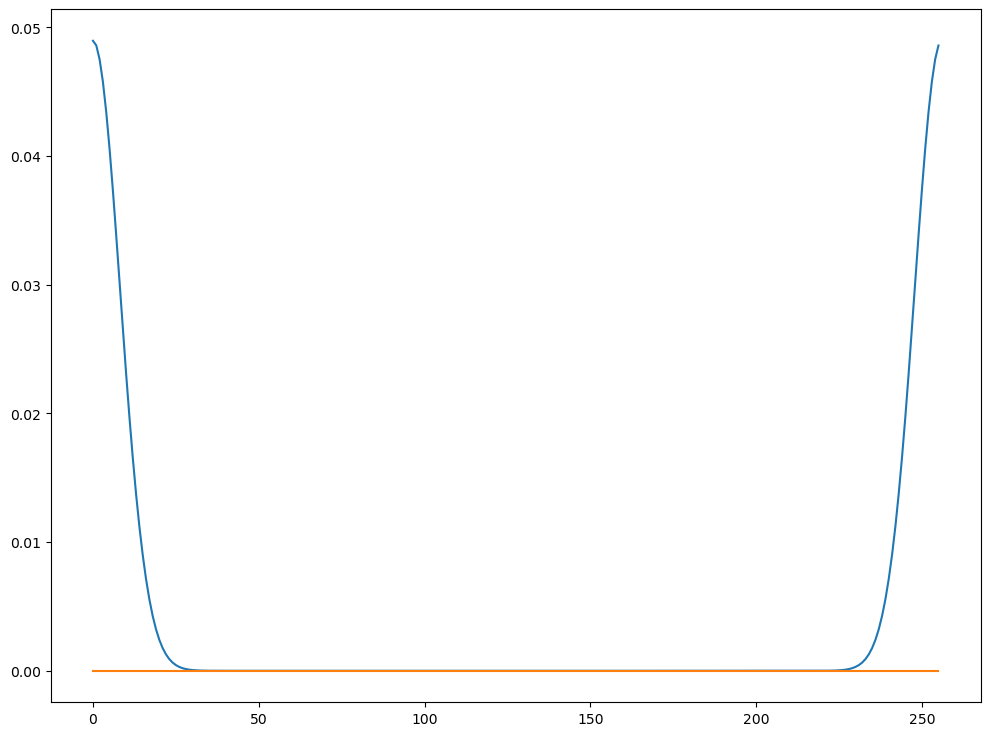

In [7]:
n = 256
kk = np.zeros(n)
kk[0:n // 2 + 1] = np.arange(n // 2 + 1)
kk[n // 2 + 1:] = - n // 2 + 1 + np.arange(n // 2 - 1)
fk = np.exp(- 0.5 * kk**2 / 5.**2)
fx = np.fft.ifft(fk)

plt.plot(fx.real)
plt.plot(fx.imag)

In [8]:
print(kk)

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128. -127. -126. -125.
 -124. -123. -122. -121. -120. -119. -118. -117. -116. -115. -114. -113.
 -112. -111. -110. -109. -108. -107. -106. -105. -104. -103. -102. -101.
 -100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -

## Convolutions through FFTs

In [9]:
n = 256
f = np.zeros(n)
f[n // 2] = 1.
g = np.zeros(256)
sigma = 5.
x = np.zeros(n)
x[0:n // 2] = np.arange(n // 2)
x[n - 1: n // 2 - 1:- 1] = -np.arange(n // 2)
g = np.exp(- 0.5 * (x**2 / sigma**2)) / (np.sqrt(2. * np.pi) * sigma)

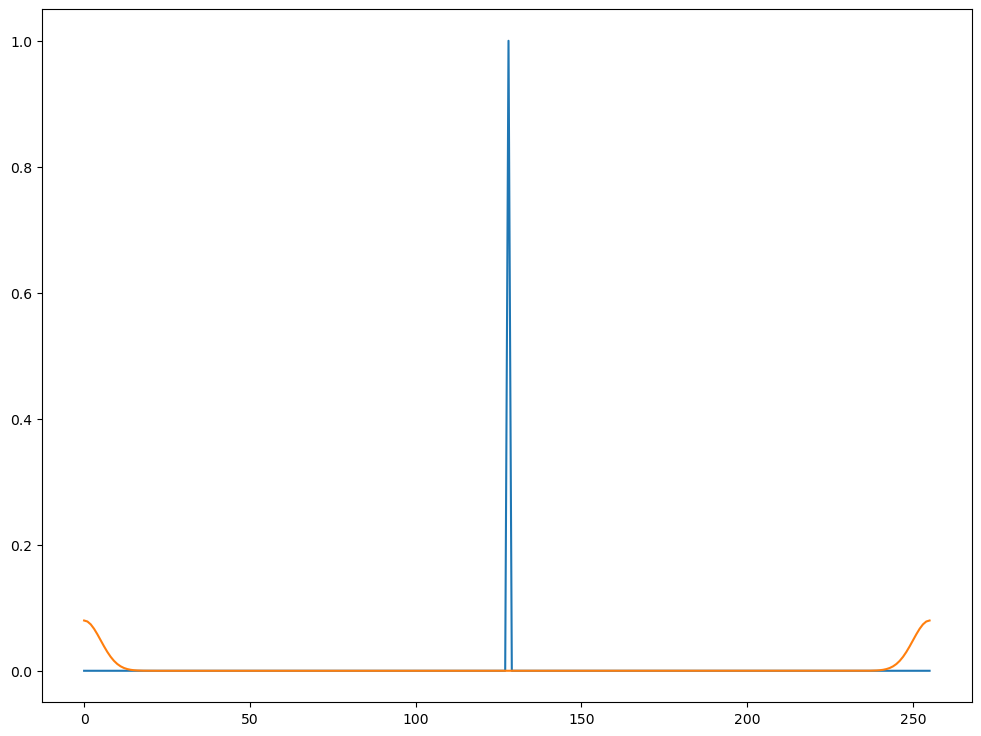

In [10]:
plt.plot(f)
plt.plot(g)

In [11]:
F = np.fft.rfft(f)
G = np.fft.rfft(g)
c = np.fft.irfft(F * G)

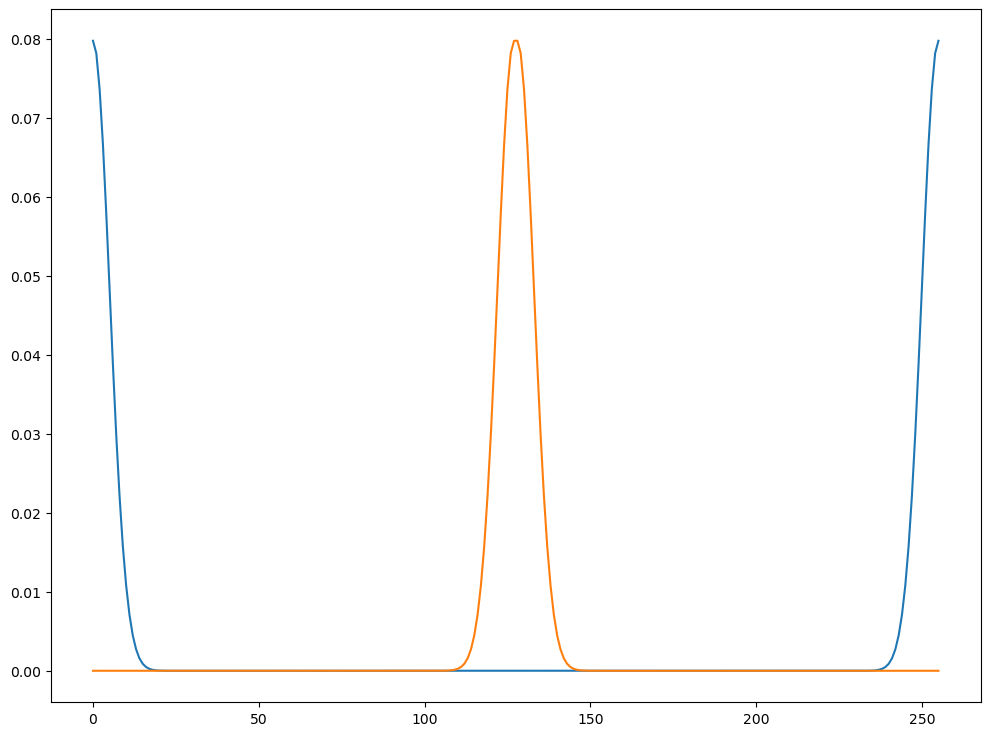

In [12]:
plt.plot(g)
plt.plot(c)

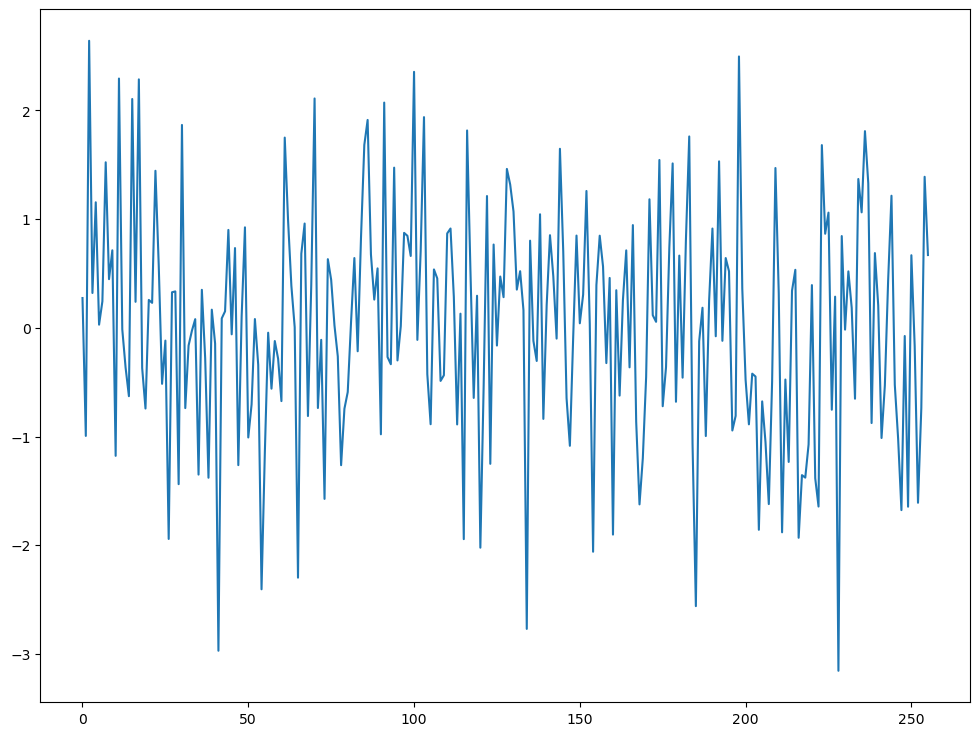

In [13]:
f = np.random.normal(size=n)
plt.plot(f)

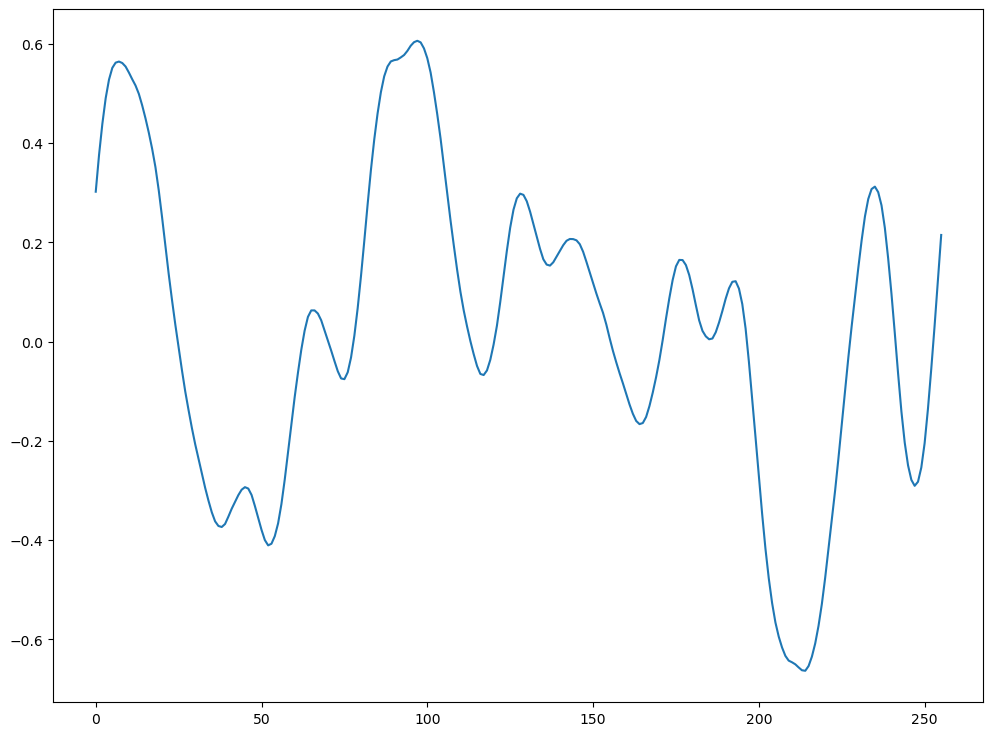

In [14]:
F = np.fft.rfft(f)
G = np.fft.rfft(g)
c = np.fft.irfft(F * G)
plt.plot(c)

In [31]:
image = Image.open('eclipse.png')
image.load()
data = np.asarray( image, dtype=np.float64)

In [32]:
print(data.shape)
print(data)

(3024, 4032)
[[27. 25. 33. ... 75. 75. 74.]
 [28. 28. 33. ... 76. 78. 79.]
 [29. 31. 30. ... 83. 87. 90.]
 ...
 [36. 35. 31. ... 23. 32. 48.]
 [34. 36. 34. ... 36. 34. 19.]
 [28. 31. 30. ... 52. 34. 22.]]


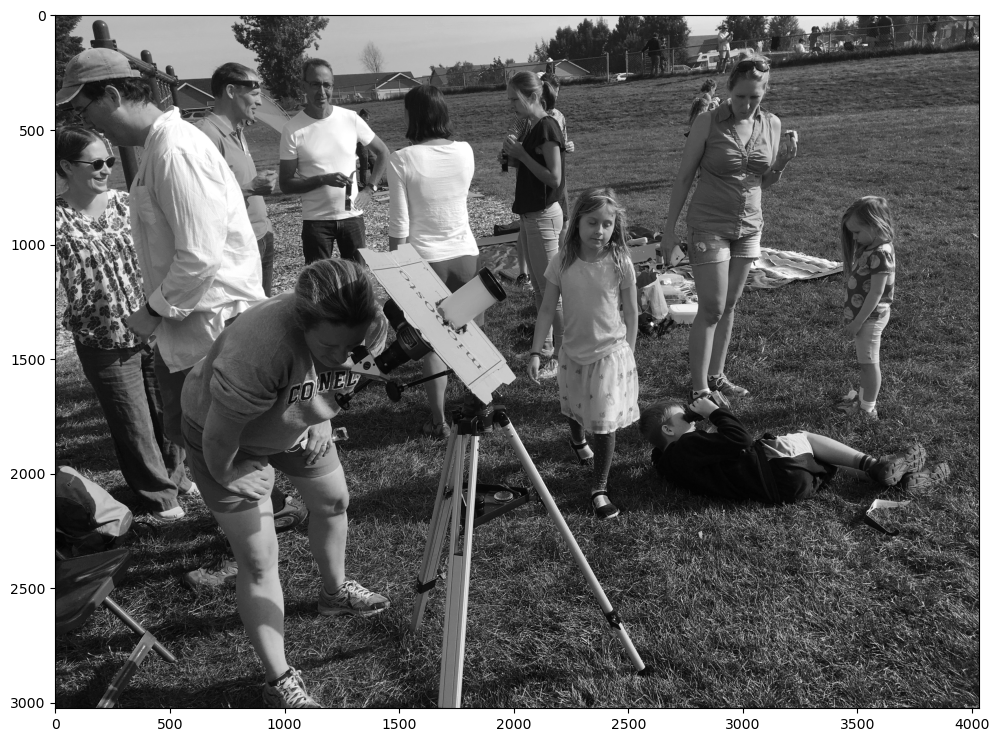

In [33]:
plt.imshow(data, cmap=cm.gray)

In [34]:
kernel = data * 0.
ysize = data.shape[0] 
xsize = data.shape[1] 
y = np.outer(((np.arange(ysize) + (ysize // 2)) % ysize) - (ysize // 2), np.ones(xsize))
x = np.outer(np.ones(ysize), ((np.arange(xsize) + (xsize // 2)) % xsize) - (xsize // 2))

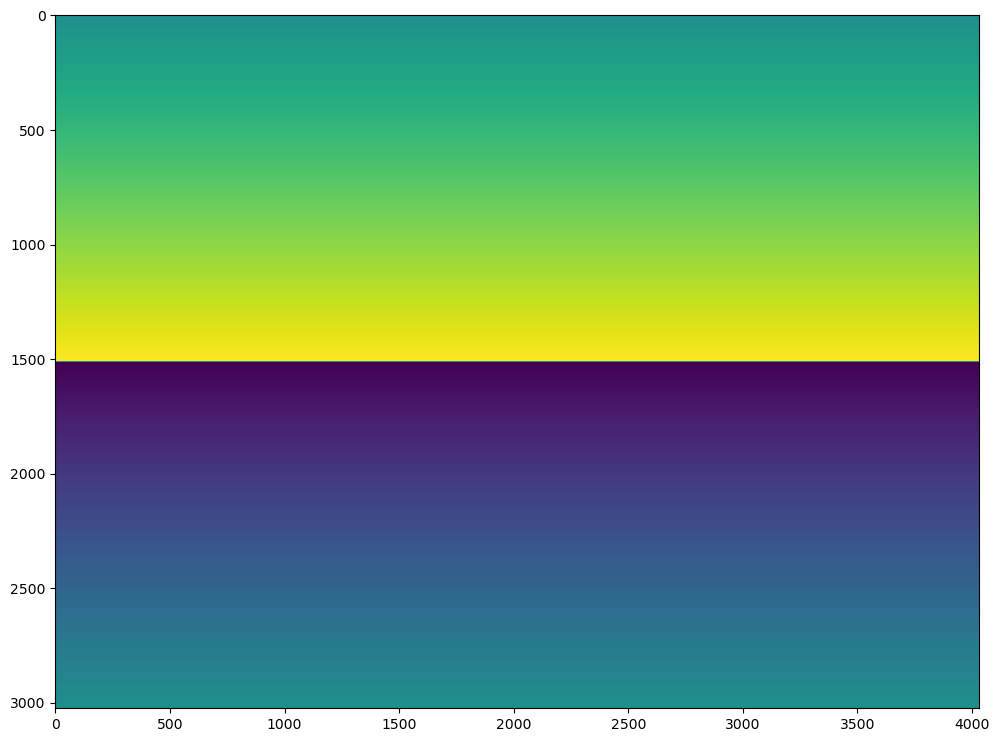

In [35]:
plt.imshow(y)

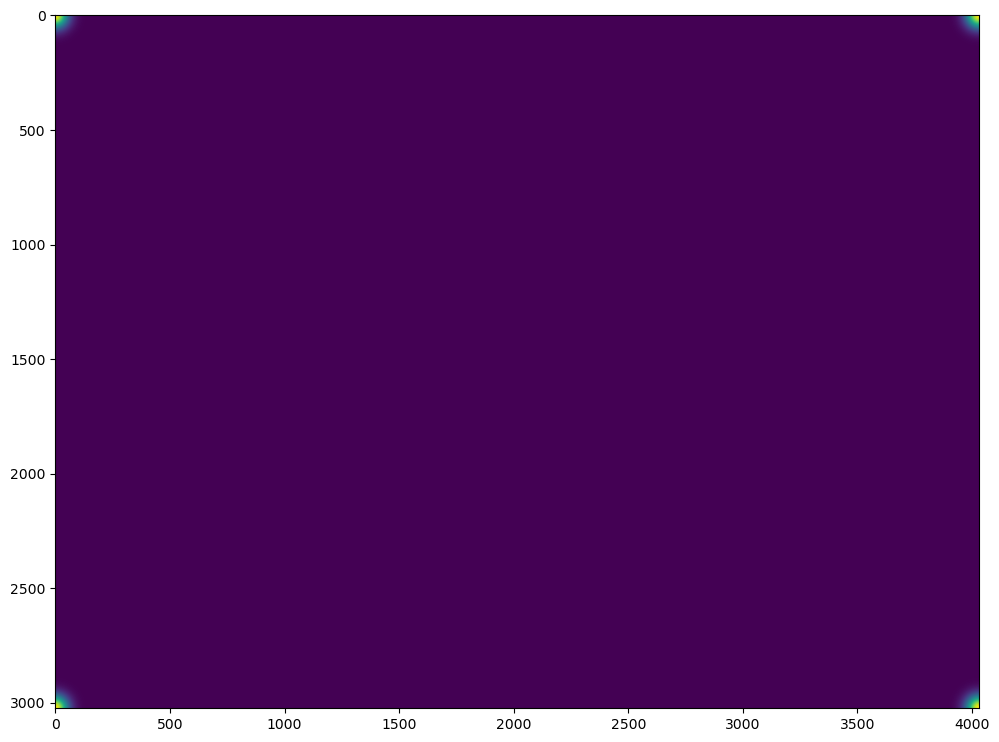

In [36]:
sigma = 40
kernel = np.exp(- 0.5 * (x**2 + y**2) / sigma**2) / (np.pi * 2. * sigma**2)
plt.imshow(kernel)

In [37]:
kernel_ft = np.fft.rfft2(kernel)
data_ft = np.fft.rfft2(data)

smoothed = np.fft.irfft2(kernel_ft * data_ft)

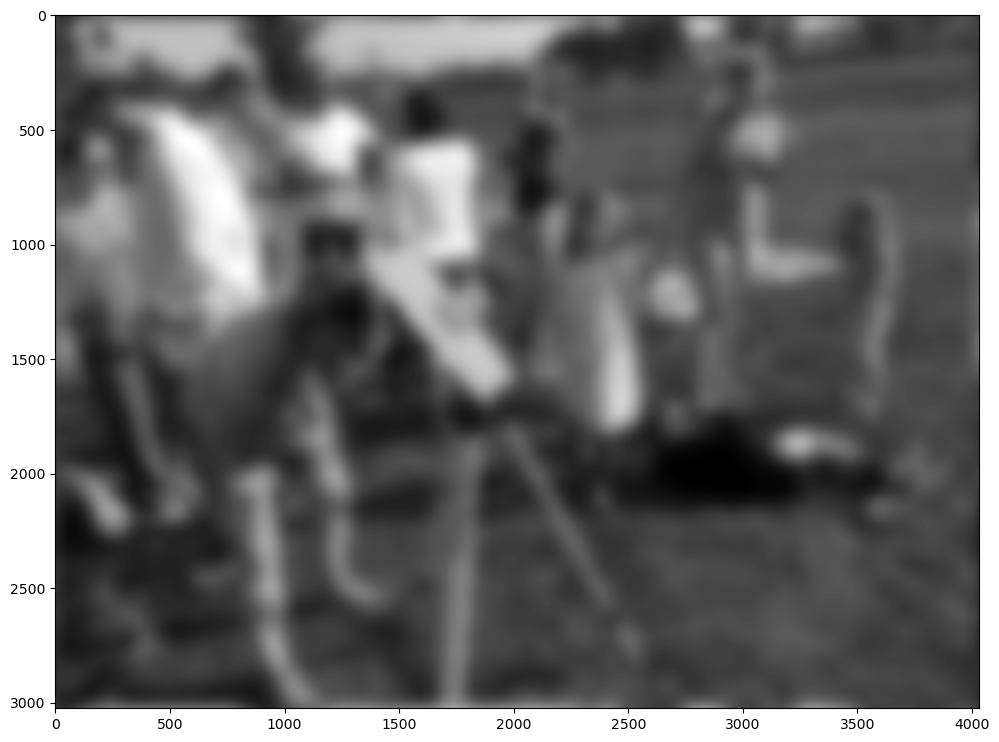

In [38]:
plt.imshow(smoothed, cmap=cm.gray)

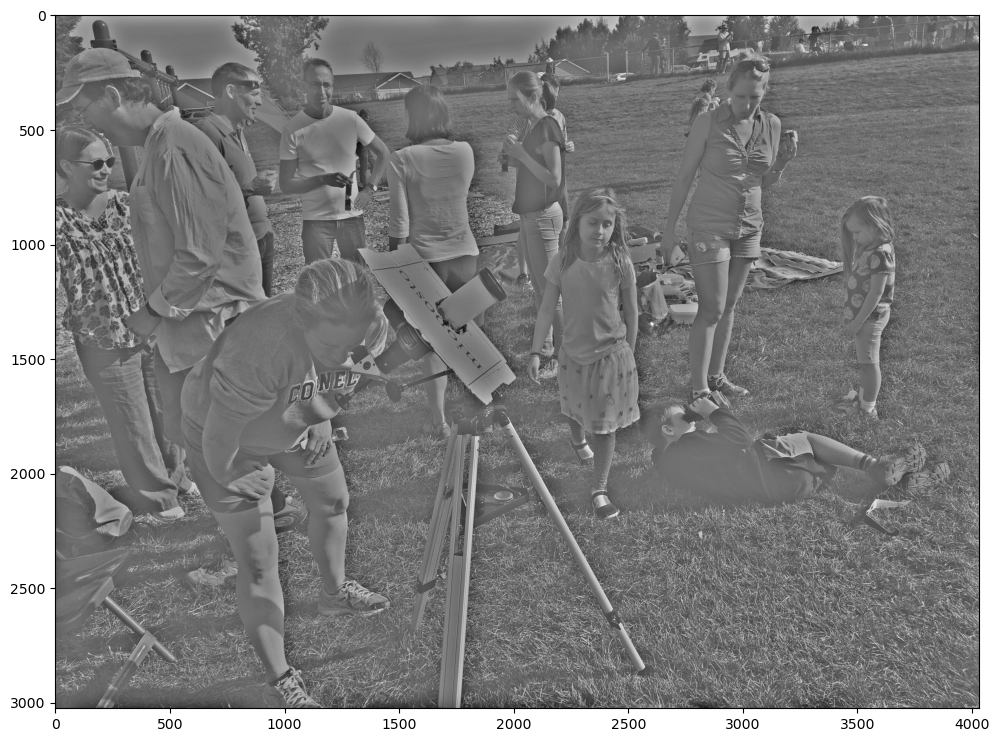

In [39]:
plt.imshow(data - smoothed, cmap=cm.gray)

Note even this is longer than it has to be since this convolution is separable. The real power with the convolution theorem comes when you have arbitrary kernels.

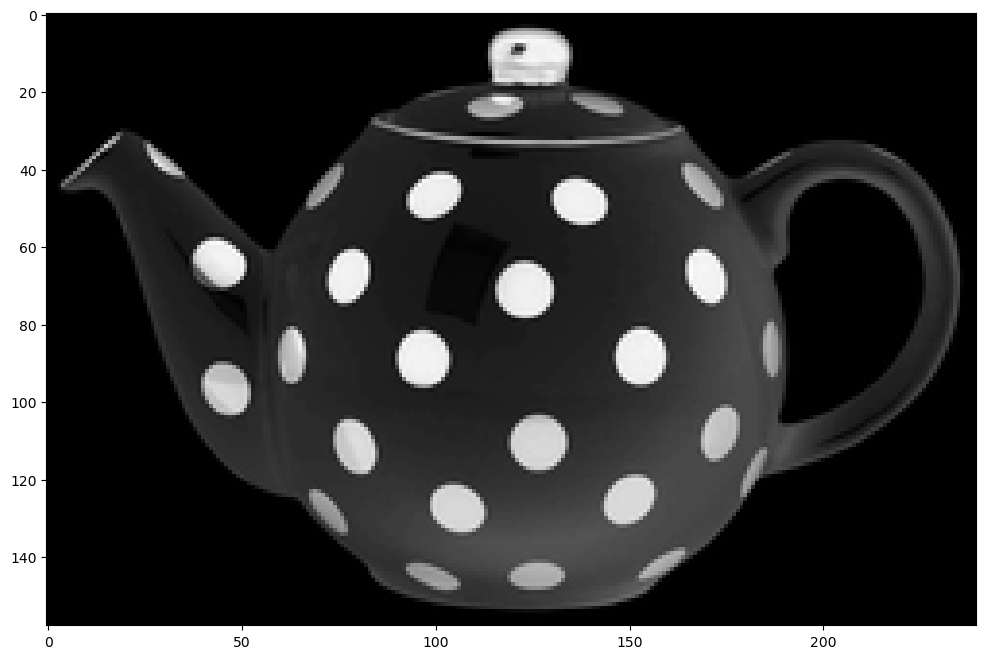

In [40]:
teapot = Image.open('teapot.png')
teapot.load()
teapot_data = 255. - np.asarray(teapot, dtype=np.float64)
plt.imshow(teapot_data, cmap=cm.gray)

In [41]:
teapot_kernel = np.zeros(data.shape)
teapot_kernel[0:teapot_data.shape[0], 0:teapot_data.shape[1]] = teapot_data
teapot_kernel = np.roll(teapot_kernel, - teapot_data.shape[0] // 2, axis=0)
teapot_kernel = np.roll(teapot_kernel, - teapot_data.shape[1] // 2, axis=1)

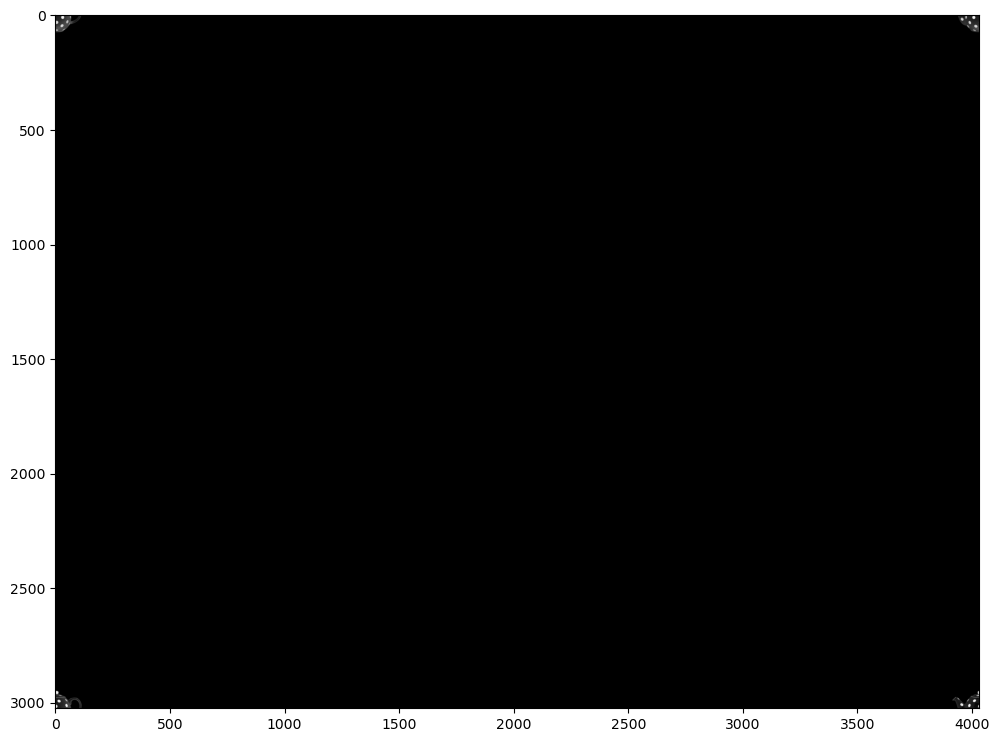

In [42]:
plt.imshow(teapot_kernel, cmap=cm.gray)

In [48]:
teapot_kernel_ft = np.fft.rfft2(teapot_kernel)
data2 = data.copy()
data2[1000, 1000] = 1000000.
data_ft = np.fft.rfft2(data2)

teapot_smoothed = np.fft.irfft2(teapot_kernel_ft * data_ft)

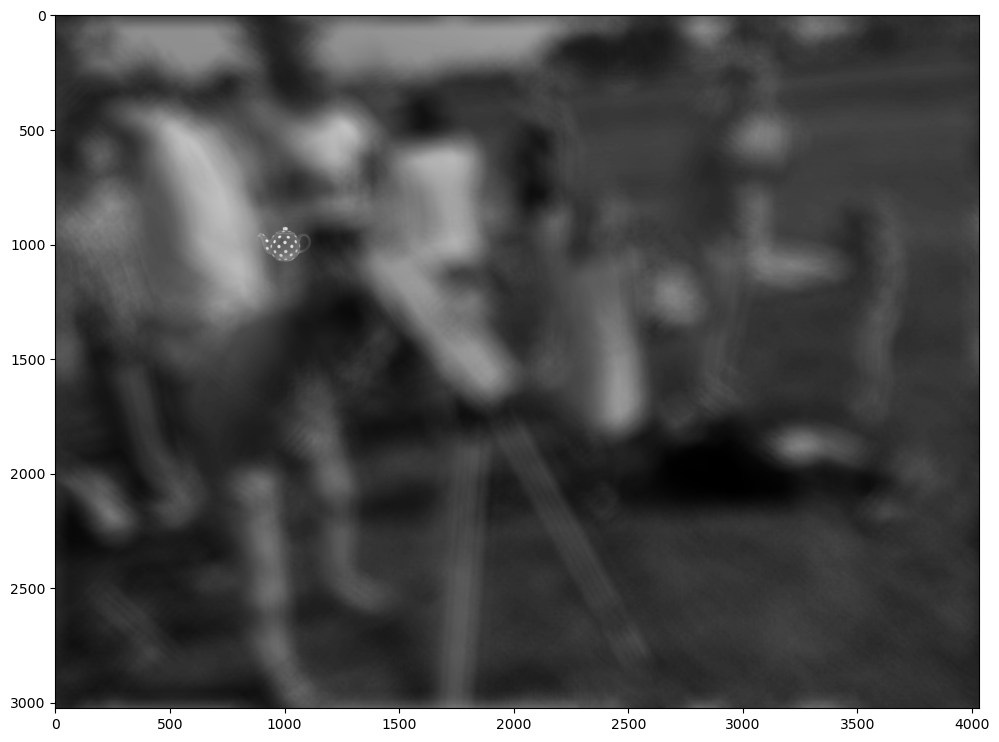

In [49]:
plt.imshow(teapot_smoothed, cmap=cm.gray)

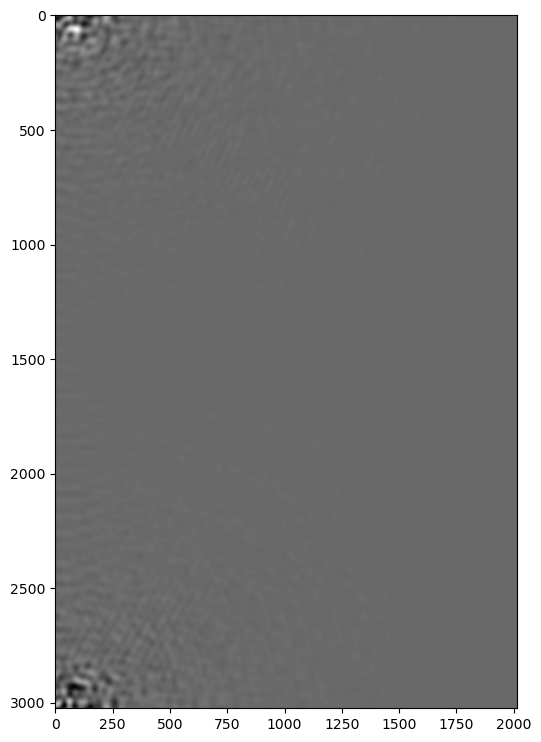

In [50]:
plt.imshow(teapot_kernel_ft.imag, cmap=cm.gray)

## Filtering

Filtering in Fourier space is basically like a type of convolution. The "filter" is just the Fourier transformation of the kernel. It is just that when it is called filtering, it usually means specifically removing frequencies (i.e. giving them zero weight). 

In [51]:
data = data
data_ft = np.fft.rfft2(data)

kernel_ft = data_ft * 0.
kernel_ft[0:30, 0:30] = 1. + 0.j
kernel_ft[-30:-1, -30:-1] = 1. + 0.j
kernel_ft[0:30, -30:-1] = 1. + 0.j
kernel_ft[-30:-1, 0:30] = 1. + 0.j

lowpass = np.fft.irfft2(kernel_ft * data_ft)

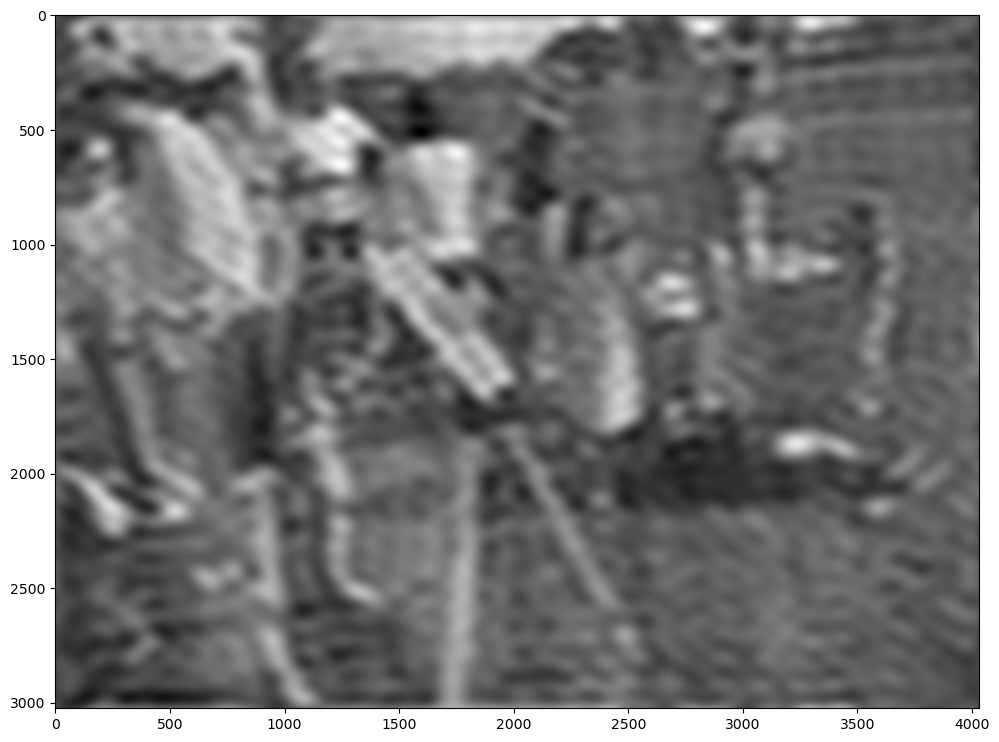

In [52]:
plt.imshow(lowpass, cmap=cm.gray)

In [53]:
data2 = data
data_ft = np.fft.rfft2(data)

kernel_ft = data_ft * 0. + 1. + 0.j
kernel_ft[0:30, 0:30] = 0. + 0.j
kernel_ft[-30:-1, -30:-1] = 0. + 0.j
kernel_ft[0:30, -30:-1] = 0. + 0.j
kernel_ft[-30:-1, 0:30] = 0. + 0.j

highpass = np.fft.irfft2(kernel_ft * data_ft)

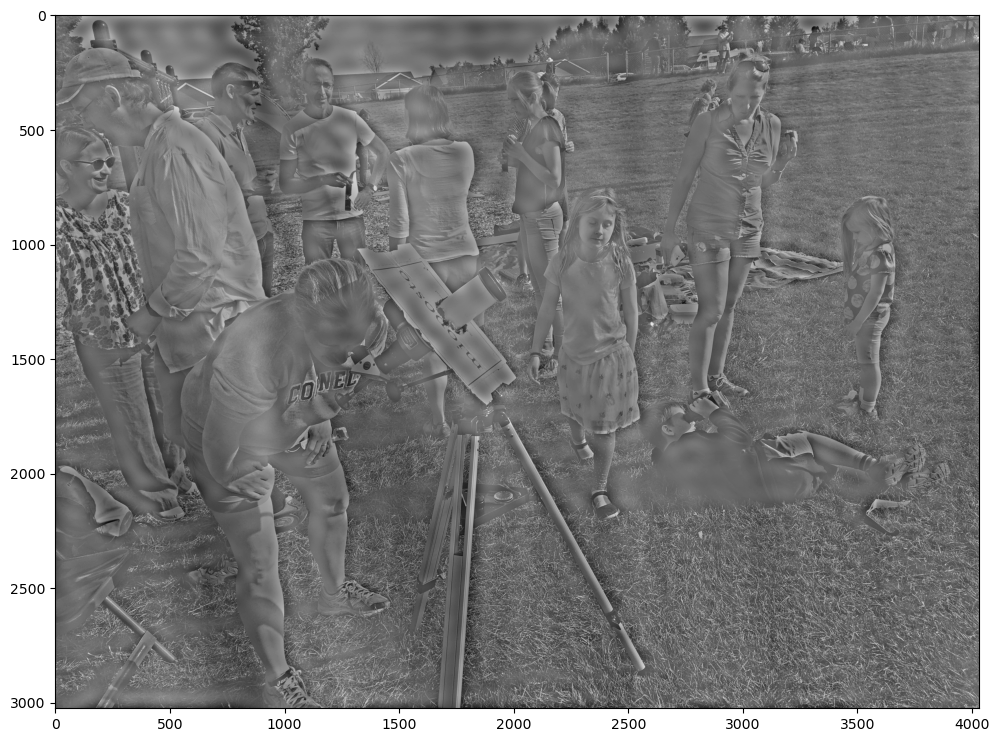

In [54]:
plt.imshow(highpass, cmap=cm.gray)

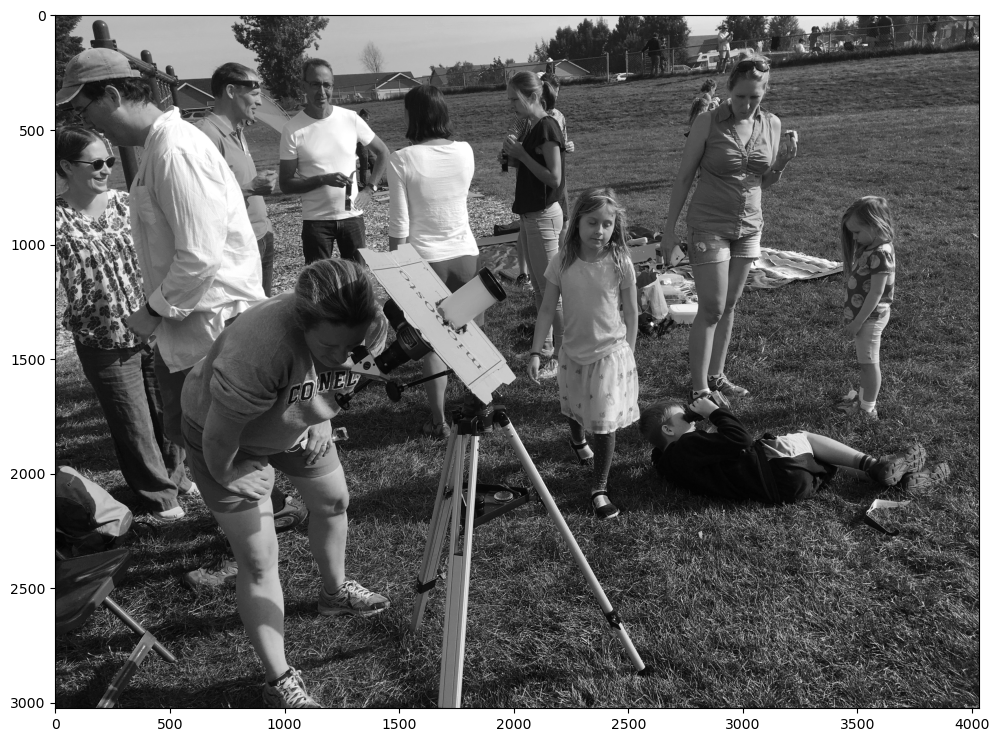

In [55]:
plt.imshow(lowpass + highpass, cmap=cm.gray)